In [30]:
%matplotlib inline

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *

from scipy.stats import ttest_ind

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Write your imports here

In [50]:
titanic_data = pd.read_csv("datasets/titanic_train.csv", index_col = "PassengerId")
titanic_data.rename({"Pclass": "Class", "Parch": "ParCh"}, axis = 1, inplace = True)
titanic_data.replace({"Embarked": {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}}, inplace = True)

In [51]:
titanic_data.head()

,Survived,Class,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


# 2.Inspect and fill missing data

In [52]:
titanic_data.Age = titanic_data.Age.fillna(titanic_data.Age.mean())

In [53]:
passengers_with_unknown_embarkation_ports = titanic_data[titanic_data.Embarked.isnull()]

In [54]:
passengers_with_unknown_embarkation_ports

,Survived,Class,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [55]:
most_common_port = titanic_data.groupby("Embarked").size().idxmax()
titanic_data.Embarked = titanic_data.Embarked.fillna(most_common_port)

In [56]:
most_common_port

'Southampton'

# 3. Remove unnecessary columns

In [57]:
titanic_data.drop(["Cabin", "Ticket", "Name"], axis = 1, inplace = True)

# 4.Explore the data single varibles

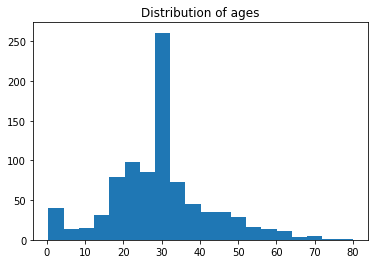

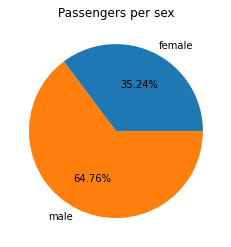

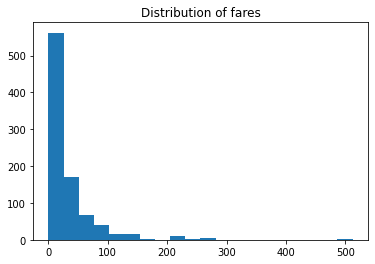

In [58]:
all_ages = titanic_data.Age
num_passengers_by_sex = titanic_data.groupby("Sex").size()
all_fares = titanic_data.Fare
### END SOLUTION

plt.hist(all_ages, bins = 20)
plt.title("Distribution of ages")
plt.show()

plt.gca().set_aspect("equal")
plt.pie(num_passengers_by_sex, labels = num_passengers_by_sex.index, autopct = "%.2f%%")
plt.title("Passengers per sex")
plt.show()

plt.hist(all_fares, bins = 20)
plt.title("Distribution of fares")
plt.show()

# 5.Explore correlations in the dataset

In [59]:
titanic_data.corr()

,Survived,Class,Age,SibSp,ParCh,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Class,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
ParCh,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [60]:
survived_passengers = titanic_data[titanic_data.Survived == 1].groupby("Sex").size()
print("Survived men: {} / {}, {:.2f}%".format(survived_passengers.male, num_passengers_by_sex.male, survived_passengers.male / num_passengers_by_sex.male * 100))
print("Survived women: {} / {}, {:.2f}%".format(survived_passengers.female, num_passengers_by_sex.female, survived_passengers.female / num_passengers_by_sex.female * 100))

Survived men: 109 / 577, 18.89%
Survived women: 233 / 314, 74.20%


In [61]:
ages_by_class = titanic_data.groupby("Class").Age

In [62]:
ages_by_class = titanic_data.groupby("Class")["Age"]
for _class, data in ages_by_class:
    print(_class, data)

1 PassengerId
2      38.0
4      35.0
7      54.0
12     58.0
24     28.0
       ... 
872    47.0
873    33.0
880    56.0
888    19.0
890    26.0
Name: Age, Length: 216, dtype: float64
2 PassengerId
10     14.000000
16     55.000000
18     29.699118
21     35.000000
22     34.000000
         ...    
867    27.000000
875    28.000000
881    25.000000
884    28.000000
887    27.000000
Name: Age, Length: 184, dtype: float64
3 PassengerId
1      22.000000
3      26.000000
5      35.000000
6      29.699118
8       2.000000
         ...    
883    22.000000
885    25.000000
886    39.000000
889    29.699118
891    32.000000
Name: Age, Length: 491, dtype: float64


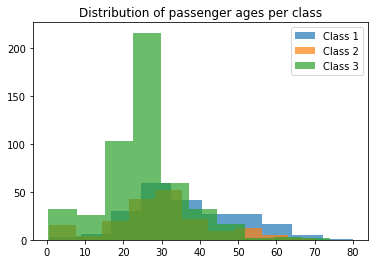

In [63]:
for passenger_class, ages in ages_by_class:
    plt.hist(ages, label = "Class {}".format(passenger_class), alpha = 0.7)
plt.title("Distribution of passenger ages per class")
plt.legend()
plt.show()

# 6. Perform hypothesis testing on age vs. class

In [64]:
first_class_ages = ages_by_class.get_group(1)
third_class_ages = ages_by_class.get_group(3)

In [65]:
test_result = ttest_ind(first_class_ages, third_class_ages, equal_var = False)
### END SOLUTION
print(test_result.pvalue)
if test_result.pvalue <= 0.01:
    print("The differences in age are significant. Reject H0.")
else:
    print("There's not enough evidence to reject H0. Don't accept or reject anything else.")

1.7607348746034483e-20
The differences in age are significant. Reject H0.


# 7.Prepare the data for modelling: indicator variables

In [66]:
titanic_data_for_modelling = pd.get_dummies(titanic_data, columns = ["Class", "Sex", "Embarked"])
### END SOLUTION
titanic_data_for_modelling.head()

,Survived,Age,SibSp,ParCh,Fare,Class_1,Class_2,Class_3,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [67]:
titanic_data_for_modelling.drop("Sex_female", axis = 1, inplace = True)

In [68]:
titanic_data_features = titanic_data_for_modelling.drop("Survived", axis = 1)
titanic_data_target = titanic_data_for_modelling.Survived

# 8. Prepare the data for modelling: normalization

In [69]:
scaler = MinMaxScaler()
titanic_data_features_scaled = scaler.fit_transform(titanic_data_features)

# 9. Split the data

In [71]:
features_train, features_test, target_train, target_test = train_test_split(
    titanic_data_features_scaled, titanic_data_target, train_size = 0.7, test_size = 0.3, random_state = 42)
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape, sep = "\r\n")

(623, 11)
(268, 11)
(623,)
(268,)


# 10.Model the data

In [73]:
model = LogisticRegression()
model.fit(features_train, target_train)
print(model.coef_, model.intercept_)

[[-1.44006871 -1.03028018 -0.32758562  0.70556203  1.05150561  0.70459547
  -0.55451803 -2.40080749  0.70912401  0.48465737  0.00780167]] [1.20158305]


C:\Users\UTENTE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 11. Score the model

In [75]:
score = model.score(features_test, target_test)
score

0.8022388059701493